# Project: Titanic - Machine Learning from Disaster

![titanic_image](titanic_image.jpg)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./titanic/train.csv")
test_df = pd.read_csv("./titanic/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Notes:
- `sibsp`:	# of siblings / spouses aboard the Titanic	
- `parch`:	# of parents / children aboard the Titanic	
- `ticket`:	Ticket number	
- `cabin`:	Cabin number

In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### PassengerID
The first column in the passenger ID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset. Let's make it the index for the dataset just to demonstrate the use of df.set_index method.

In [6]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop("PassengerId", axis = 1, inplace = True) 
# axis = 1 là drop toàn bộ, inplace là drop trên data luôn 

In [9]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# thủ thuật khác
test_df = pd.read_csv("./titanic/test.csv", index_col="PassengerId")
# index_col cho phép chọn bất cứ cột nào làm index

In [11]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Feature Classification: Categorical vs Number
- This help us select the appropriate plots for visualization
### Which features ate categoricals?
- Categorical Feature: `nominal`, `ordinal`, `ratio`, `interval`
- To classify the samples into sets of similar samples
### Which features are numerical?
- Numerical Features: `discrete`, `continuous`, or `timeseries`
- These values change from sample to sample

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### Dựa vào bản thân để đánh giá dữ liệu thuộc loại nào
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`(ordinal), `SibSp`, `Parch`
- Numerical: (continuous) `Age`, `Fare`, (discrete)
- Mix types of data: `Ticket`, `Cabin`
- Contain Error/Typo: `Name`
- Blank or Null: `Cabin` > `Age` > `Embarked`
- Various Data Types: String, Int, Float

According to the data dictionary, we know that if a passernger is marked as 1, he or she survied. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the column is int64, which is a numerical type. We can change that with the following command.

In [14]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [15]:
converted_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

def converted_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
converted_cat(train_df, converted_features)
converted_cat(test_df, converted_features)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of Numerical features values across the samples

In [17]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical features

In [18]:
train_df.describe(include = ["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 2. Exploratory Data Analysis (EDA)
Phân tích khai phá dữ liệu

### Correlating categorical features
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`(ordinal), `SibSp`, `Parch`

### Target Variable: Survived

In [19]:
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [20]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is not serve which is why I will not consider techniques like sampling to tackle the imbalance.


### `Sex`

In [21]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


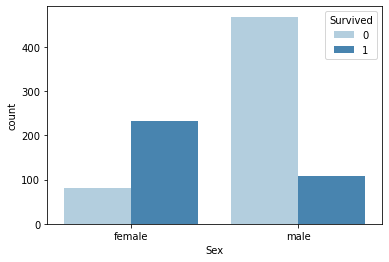

In [22]:
sns.countplot(data = train_df, x = "Sex",hue = "Survived", palette= "Blues");

- Remaining Cateforical Feature Columns

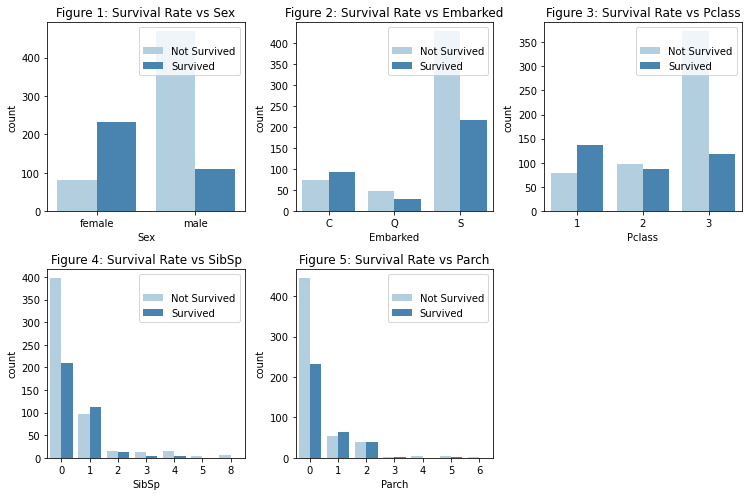

In [23]:
cols = cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5) );

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x = cols[i], hue = "Survived", palette="Blues", ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title = " ", loc = "upper right", labels = ["Not Survived", "Survived"])

ax.flat[-1].set_visible(False) # Remove the last subplot          
plt.tight_layout()
plt.show()

 **Survival Rate:**
- Fig 1: Female survival rate > male
- Fig 2: Most People embarked on Southampton, and also had the highest people not survived
- Fig 3: 1st class higher survival rate
- Fig 4: People going with 0 SibSp are mostly not survived. the number of passenger with 1-2 family members has a better chance of survival
- Fig 5: People going with 0 Parch are mostly not survived

## 3.2. EDA for Numerical Features
- Numerical Features: (continuous) `Age`, `Fare`

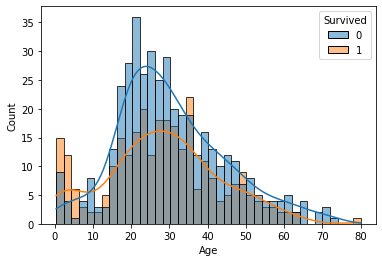

In [24]:
sns.histplot(data=train_df, x = "Age", bins = 40, hue = "Survived", kde = True);

- Majority passengers were from 18-40 ages
- Chilren had more chance to survive than other ages

### Fare

In [25]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

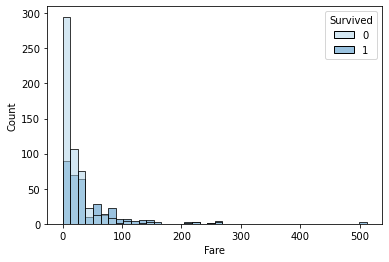

In [26]:
sns.histplot(data=train_df, x = "Fare", hue = "Survived",bins = 40, palette= "Blues");

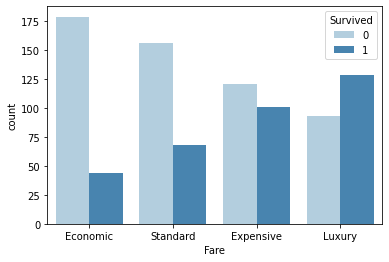

In [27]:
# To name for 0-25% quartile, 25-50, 50-75, 75-100
fare_categories = ["Economic", "Standard", "Expensive", "Luxury"]
quartitle_data = pd.qcut(train_df["Fare"], 4, labels = fare_categories)

sns.countplot(x = quartitle_data, hue = train_df["Survived"], palette="Blues");

In [28]:
train_df["Fare"]

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

**Distribution of Fare**
- Fare does not follow a normal distribution and has a huge spike at the price range [0–100$].
- The distribution is skewed to the left with 75% of the fare paid under `$31` and a max paid fare of `$512`.

**Quartile plot:**
- Passenger with Luxury & Expensive Fare will have more chance to survive

## 4. Feature Engineering & Data Wrangling
- Feature Engineering: Quá trình chuyển đổi dữ liệu thô ban đầu thành 1 tập thuộc tính, giúp biểu diễn tập dữ liệu ban đầu 1 cách tốt hơn
- Data Wrangling: sắp xếp dữ liệu, chuyển đổi dữ liệu thô thành dữ liệu sẵn sàng để phân tích

### 4.1.  Feature Engineering

#### Name
- Regular Expression

In [29]:
train_df["Name"].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [41]:
import re # regular expression
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip() #strip() để bỏ dấu trắng
train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()



Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [42]:
train_df[train_df["Name"].str.contains('Mrs. Martin')]["Name"]

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object